In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import random
from manofunkcijos import *

import requests
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver # naršyklės kontroleris
from selenium.webdriver.chrome.options import Options #Naršyklės
# pip install beautifulsoup4 selenium
import time

In [106]:
from pylatexenc.latex2text import LatexNodes2Text
from pylatexenc.latexencode import UnicodeToLatexEncoder

In [15]:
import DATA.manofunkcijos
# from ../../../manofunkcijos import *

In [32]:
df = pd.read_csv('c:/Users/manta/OneDrive/Dokumentai/Python mokymai/Mokymosi medžiaga/2024_10_25_17val44min_III_P_K_A_params.dat', delimiter=';')

In [21]:
ndf.head()

,SC,F/B,Uoc,jsc,FF,Umax,jmax,Pmax,PCE,S,t
1,P_III_REF_1k_10-25,FW,1.048,-14.83888,57.3896,0.736,-12.126249999999999,-8.9247,8.9247,0.08,-1.0
2,P_III_REF_1k_10-25,BW,1.048,-14.98405,59.5824,0.827,-11.31375,-9.3564,9.3564,0.08,-1.0
3,P_III_REF_2k_10-25,FW,0.996,-13.43314,61.5012,0.736,-11.18,-8.2285,8.2285,0.08,-1.0
4,P_III_REF_2k_10-25,BW,1.035,-13.8441,63.4651,0.775,-11.73375,-9.0937,9.0937,0.08,-1.0
5,P_III_REF_3k_10-25,FW,0.957,-12.25571,59.4133,0.723,-9.63875,-6.9684,6.9684,0.08,-1.0


In [58]:
ndf = df[1:]

In [38]:
ndf.columns

Index(['SC ', ' F/B ', ' Uoc ', ' jsc ', ' FF ', ' Umax ', ' jmax ', ' Pmax ',
       ' PCE', ' S', ' t'],
      dtype='object')

In [59]:
ndf['PAV'] = ndf['SC '].apply(lambda x: str(x).split('_')[2].replace('+','\n'))
ndf['jsc'] = ndf[' jsc '].apply(lambda x: float(x.replace('-','')))
ndf['Uoc'] = ndf[' Uoc '].apply(lambda x: float(x))
ndf['FF'] = ndf[' FF '].apply(lambda x: float(x))
ndf['PCE'] = ndf[' PCE'].apply(lambda x: float(x))

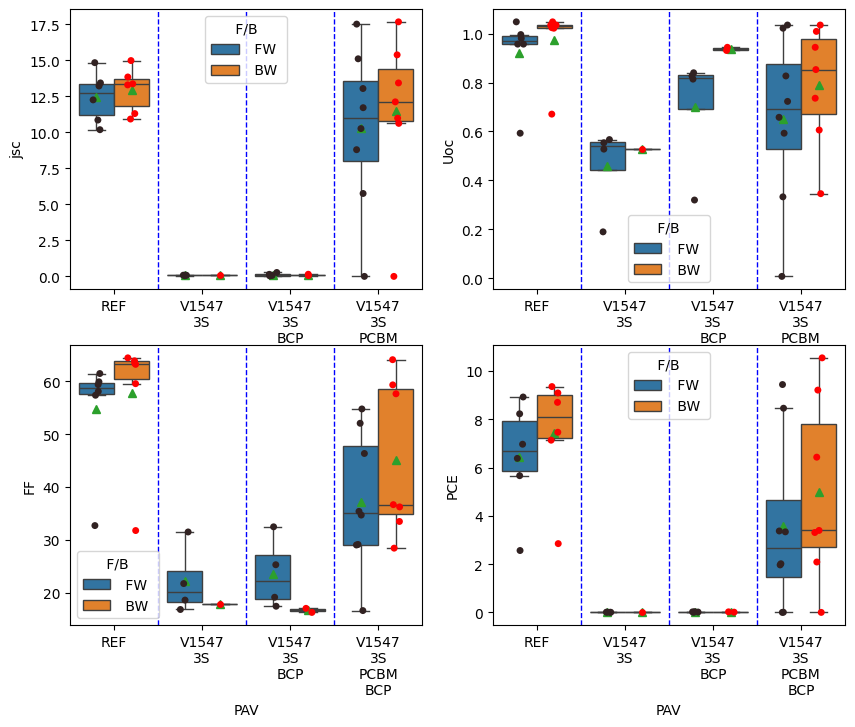

In [112]:
fig, axes = plt.subplots(2,2,figsize=(10,8))
colors = ['grey','red']
pavs = set(list(ndf[' F/B ']))
sns.boxplot(data=ndf,x = 'PAV', y='jsc', ax=axes[0,0], showmeans=True, showfliers=False, hue=' F/B ')
sns.stripplot(data=ndf,x = 'PAV', y='jsc', ax=axes[0,0], hue=' F/B ', dodge=True, color='red',legend=False)
sns.boxplot(data=ndf,x = 'PAV', y='Uoc', ax=axes[0,1], showmeans=True, showfliers=False, hue=' F/B ')
sns.stripplot(data=ndf,x = 'PAV', y='Uoc', ax=axes[0,1], hue=' F/B ', dodge=True, color='red',legend=False)
sns.boxplot(data=ndf,x = 'PAV', y='FF', ax=axes[1,0], showmeans=True, showfliers=False, hue=' F/B ')
sns.stripplot(data=ndf,x = 'PAV', y='FF', ax=axes[1,0], hue=' F/B ', dodge=True, color='red',legend=False)
sns.boxplot(data=ndf,x = 'PAV', y='PCE', ax=axes[1,1], showmeans=True, showfliers=False, hue=' F/B ')
sns.stripplot(data=ndf,x = 'PAV', y='PCE', ax=axes[1,1], hue=' F/B ', dodge=True, color='red',legend=False)
pavs = set(ndf['PAV'])
for ax in axes.flat:
    for x in range(len(pavs) - 1): 
        ax.axvline(x=x + 0.5, color="blue", linestyle="--", linewidth=1)  

plt.show()